In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Excel file to examine its structure
file_path = "C:/Users/singh/Downloads/customer_segmentation.xlsx"
df = pd.read_excel(file_path)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      2000 non-null   int64 
 1   Gender          2000 non-null   object
 2   Age             2000 non-null   int64 
 3   AnnualIncome    2000 non-null   int64 
 4   SpendingScore   2000 non-null   int64 
 5   Profession      2000 non-null   object
 6   WorkExperience  2000 non-null   int64 
 7   FamilySize      2000 non-null   int64 
 8   MembershipType  2000 non-null   object
 9   Region          2000 non-null   object
dtypes: int64(6), object(4)
memory usage: 156.4+ KB


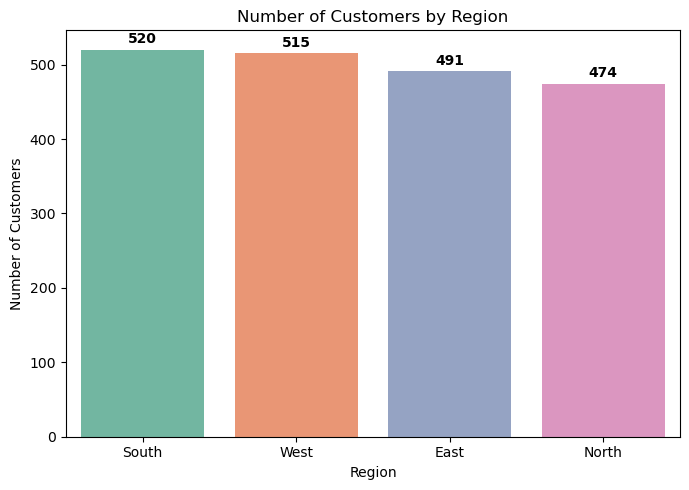

In [39]:
region_counts = df['Region'].value_counts()
plt.figure(figsize=(7, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, hue=region_counts.index, palette="Set2", dodge=False, legend=False)
plt.title("Number of Customers by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")

# Annotate bar values
for i, val in enumerate(region_counts.values):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


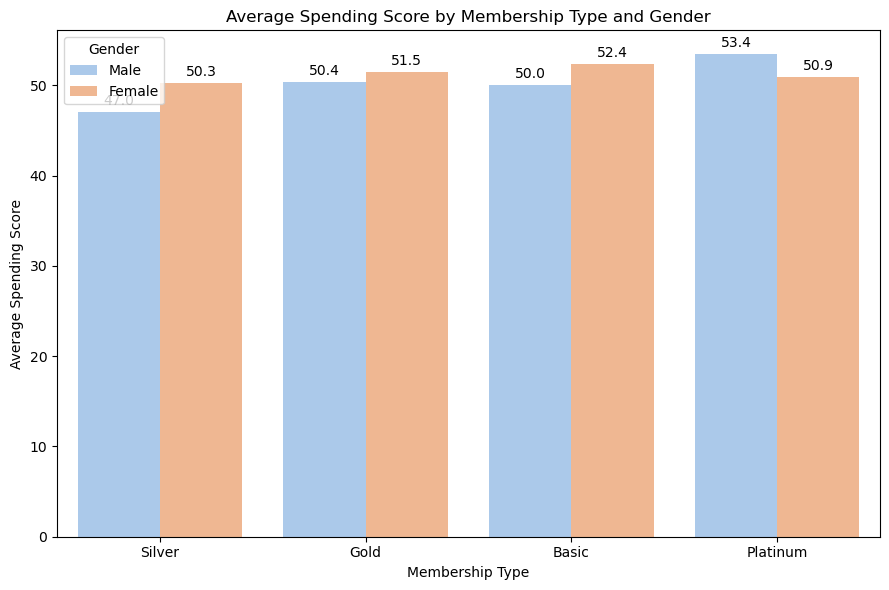

In [36]:

plt.figure(figsize=(9, 6))
ax = sns.barplot(data=df, x='MembershipType', y='SpendingScore', hue='Gender', estimator=np.mean, ci=None, palette='pastel')

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

plt.title("Average Spending Score by Membership Type and Gender")
plt.xlabel("Membership Type")
plt.ylabel("Average Spending Score")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


In [12]:
# Question 3: Top 5 highest spending customers in the West region
top5_west = df[df['Region'] == 'West'].sort_values(by='SpendingScore', ascending=False).head(5)
top5_west[['CustomerID', 'SpendingScore', 'AnnualIncome', 'Age', 'MembershipType']]


,CustomerID,SpendingScore,AnnualIncome,Age,MembershipType
1199,1200,100,103596,33,Basic
756,757,100,47990,50,Platinum
293,294,100,56268,58,Gold
1209,1210,100,148498,46,Basic
1100,1101,99,44272,64,Silver


In [14]:
# Question 4: Filter female customers under age 30 with a Gold membership
filtered_females = df[(df['Gender'] == 'Female') & (df['Age'] < 30) & (df['MembershipType'] == 'Gold')]
filtered_females[['CustomerID', 'Gender', 'Age', 'MembershipType', 'AnnualIncome']]


,CustomerID,Gender,Age,MembershipType,AnnualIncome
1,2,Female,29,Gold,136450
25,26,Female,27,Gold,117136
71,72,Female,21,Gold,108668
108,109,Female,22,Gold,26716
125,126,Female,26,Gold,25410
...,...,...,...,...,...
1838,1839,Female,18,Gold,113809
1869,1870,Female,28,Gold,126616
1880,1881,Female,29,Gold,38452
1937,1938,Female,29,Gold,96240


In [15]:
# Question 5: Average annual income for Engineers with more than 10 years of work experience
engineers_10plus = df[(df['Profession'] == 'Engineer') & (df['WorkExperience'] > 10)]
avg_income_engineers = engineers_10plus['AnnualIncome'].mean()
avg_income_engineers


83045.92929292929

In [18]:
# Question 6: Profession with highest average spending score
avg_spending_by_profession = df.groupby('Profession')['SpendingScore'].mean().sort_values(ascending=False)
avg_spending_by_profession.head(10)


Profession
Artist      52.281501
Doctor      51.680435
Business    51.492683
Teacher     49.733333
Engineer    48.196474
Name: SpendingScore, dtype: float64

In [19]:
# Question 7: Filter customers with Basic membership and income > ₹100,000
high_income_basic = df[(df['MembershipType'] == 'Basic') & (df['AnnualIncome'] > 100000)]
high_income_basic[['CustomerID', 'AnnualIncome', 'MembershipType', 'Age', 'Gender', 'Profession']]


,CustomerID,AnnualIncome,MembershipType,Age,Gender,Profession
3,4,118234,Basic,41,Male,Business
19,20,137886,Basic,43,Male,Engineer
35,36,115998,Basic,32,Male,Doctor
48,49,116136,Basic,56,Female,Engineer
52,53,106497,Basic,56,Male,Artist
...,...,...,...,...,...,...
1964,1965,143364,Basic,57,Male,Engineer
1973,1974,127216,Basic,63,Female,Business
1981,1982,119977,Basic,62,Female,Doctor
1983,1984,145947,Basic,31,Male,Artist


In [20]:
# Question 8: Average family size in the South region
avg_family_south = df[df['Region'] == 'South']['FamilySize'].mean()
avg_family_south


3.453846153846154

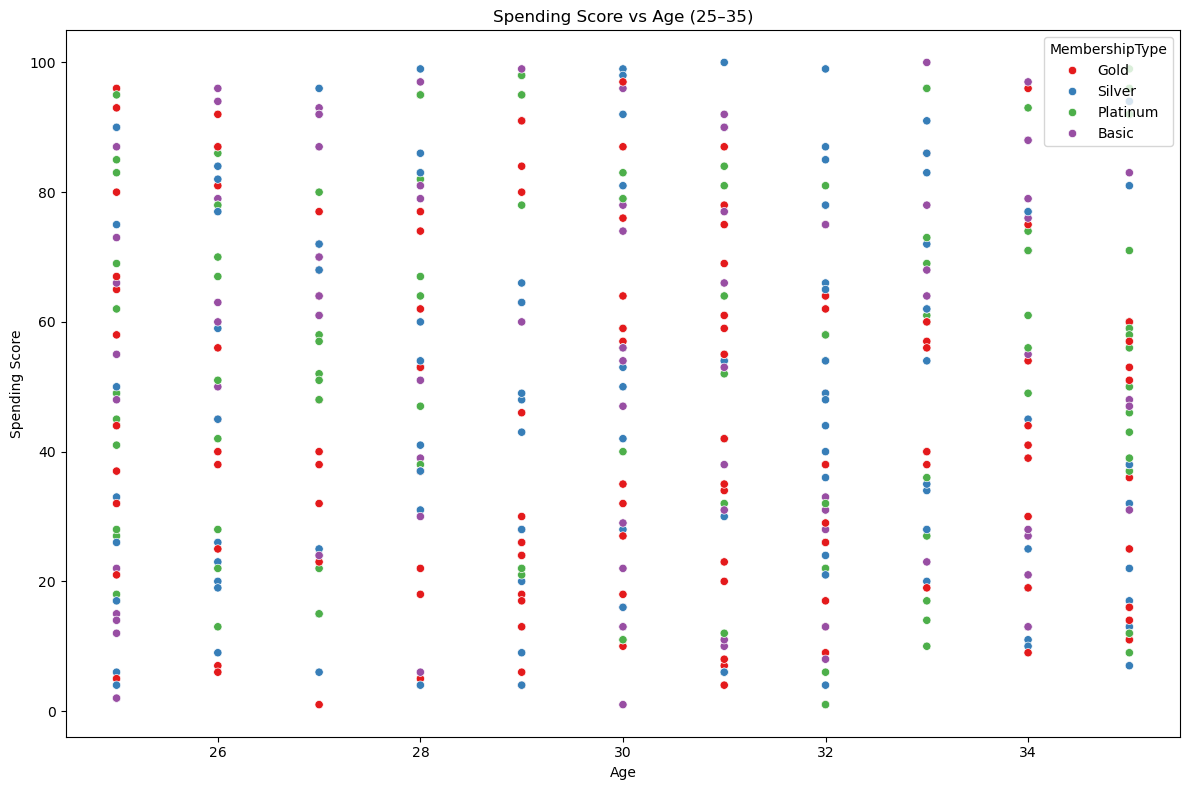

In [26]:
# Question 9: Spending behavior for customers aged 25–35
age_range_df = df[(df['Age'] >= 25) & (df['Age'] <= 35)]

plt.figure(figsize=(12, 8))
sns.scatterplot(data=age_range_df, x='Age', y='SpendingScore', hue='MembershipType', palette='Set1')
plt.title("Spending Score vs Age (25–35)")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.tight_layout()
plt.show()


In [27]:
# Question 10: Most common profession among Platinum members
platinum_profession_mode = df[df['MembershipType'] == 'Platinum']['Profession'].mode()[0]
platinum_profession_mode


'Doctor'

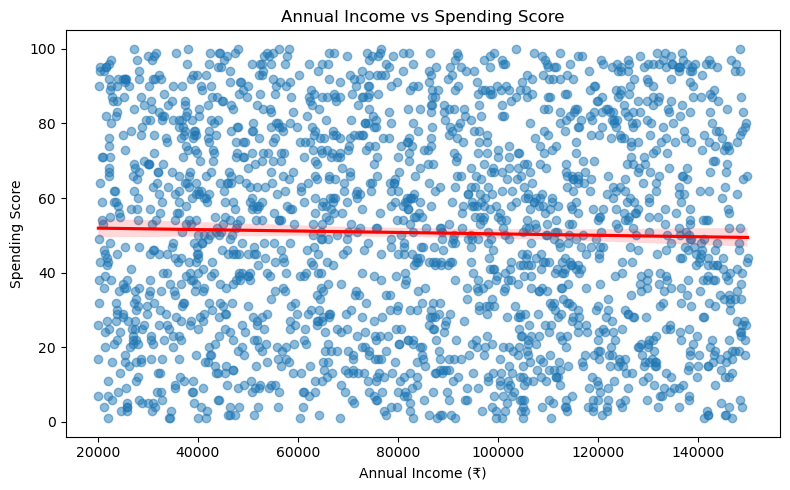

In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# Question 11: Relationship between annual income and spending score (scatterplot with regression line)
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='AnnualIncome', y='SpendingScore', scatter_kws={'alpha': 0.5}, line_kws={"color": "red"})
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income (₹)")
plt.ylabel("Spending Score")
plt.tight_layout()
plt.show()



C:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



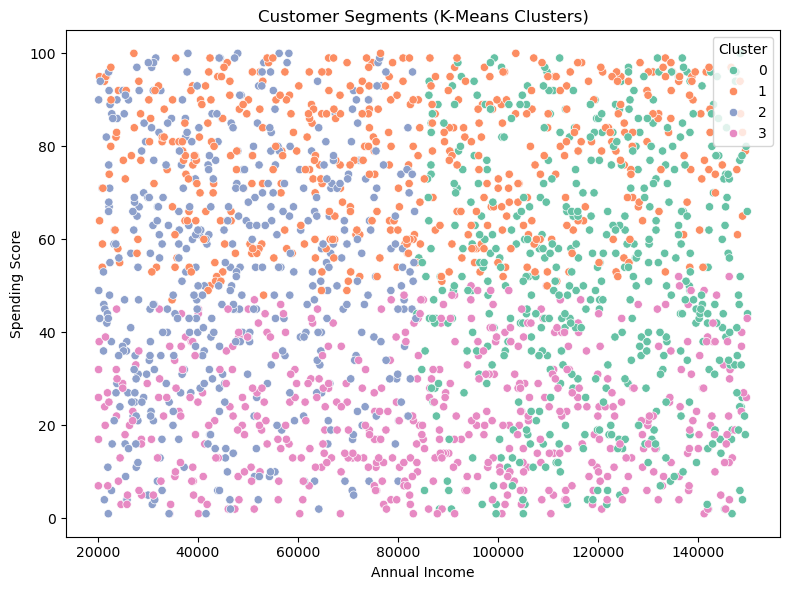

In [41]:

# Question 12: K-means clustering based on Age, Income, and Spending Score
cluster_data = df[['Age', 'AnnualIncome', 'SpendingScore']].dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='AnnualIncome', y='SpendingScore', hue='Cluster', palette='Set2')
plt.title("Customer Segments (K-Means Clusters)")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Encode categorical variables
df_model = df[['Age', 'AnnualIncome', 'SpendingScore', 'Profession', 'MembershipType']].dropna()
label_encoder_profession = LabelEncoder()
df_model['ProfessionEncoded'] = label_encoder_profession.fit_transform(df_model['Profession'])

# Encode target variable
label_encoder_membership = LabelEncoder()
df_model['MembershipEncoded'] = label_encoder_membership.fit_transform(df_model['MembershipType'])

# Define features and target
X = df_model[['Age', 'AnnualIncome', 'SpendingScore', 'ProfessionEncoded']]
y = df_model['MembershipEncoded']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, target_names=label_encoder_membership.classes_)
print(report)


              precision    recall  f1-score   support

       Basic       0.26      0.28      0.27       104
        Gold       0.17      0.15      0.16        96
    Platinum       0.22      0.30      0.25        91
      Silver       0.28      0.21      0.24       109

    accuracy                           0.23       400
   macro avg       0.23      0.23      0.23       400
weighted avg       0.23      0.23      0.23       400



In [33]:
# Question 14: Recommend upgrade for high-income Basic members (Income > ₹100,000)

upgrade_candidates = df[(df['MembershipType'] == 'Basic') & (df['AnnualIncome'] > 100000)]
upgrade_candidates[['CustomerID', 'AnnualIncome', 'SpendingScore', 'MembershipType', 'Profession', 'Region']].head(10)


,CustomerID,AnnualIncome,SpendingScore,MembershipType,Profession,Region
3,4,118234,9,Basic,Business,South
19,20,137886,34,Basic,Engineer,East
35,36,115998,26,Basic,Doctor,North
48,49,116136,79,Basic,Engineer,South
52,53,106497,16,Basic,Artist,North
58,59,118646,65,Basic,Doctor,East
79,80,138428,18,Basic,Artist,South
126,127,103375,31,Basic,Doctor,East
132,133,106716,36,Basic,Doctor,West
140,141,114611,58,Basic,Doctor,South


In [34]:
# Question 15: Count of customers with family size > 4 and spending score > 60
filtered_customers = df[(df['FamilySize'] > 4) & (df['SpendingScore'] > 60)]
count_filtered = filtered_customers.shape[0]
count_filtered


269